<a href="https://colab.research.google.com/github/mingmingbupt/tensorflow/blob/master/tf_keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
# import keras 使用的是keras, 如果像切换，改库就行了

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


TensorFlow 2.x selected.
2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.0
numpy 1.18.2
pandas 0.25.3
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


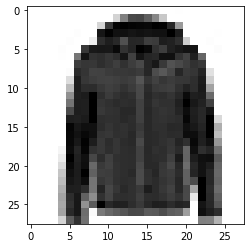

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") #cmap黑白图谱
    plt.show()

show_single_image(x_train[0])

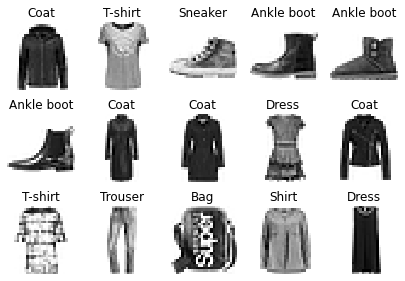

In [6]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names): #n行 n列
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off') #坐标系关掉
            plt.title(class_names[y_data[index]]) #配置title
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
# tf.keras.models.Sequential()
#他就是把一些列的层次呢 堆叠起来

"""
首先创建要给Sequential对象
model = keras.models.Sequential()
然后添加层次，首先添加输入层
这一层做的呢就是，我把输入的28*28的图片flatten展平，把28*28的二维矩阵展平为一个28*28的一个一维向量，
model.add(keras.layers.Flatten(input_shape=[28, 28]))
再加入一个新的一层，全连接层，单元数为300，激活函数为relu
model.add(keras.layers.Dense(300, activation="relu"))
再添加一个全连接层，这一层把单元数设成100
model.add(keras.layers.Dense(100, activation="relu"))
输出为一个长度为10的输出
model.add(keras.layers.Dense(10, activation="softmax"))
"""



model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
# 我们使用sparse的原因是 y是一个长度等于样本数的一个向量，那么对于每个样本来说呢，只是一个值，也就是说y只是一个index值
# y_train
# array([4, 0, 7, ..., 3, 0, 5], dtype=uint8). 这里每个样本的y是一个数，如果想要变成向量，需要one_hot
# 如果y已经是一个向量了，就用categorical_crossentropy，如果y只是一个数，我们就用sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", #稀疏类别交叉熵的损失函数
              optimizer = "sgd",
              metrics = ["accuracy"])

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [0]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 113us/sample - loss: 1.9139 - accuracy: 0.7326 - val_loss: 0.6136 - val_accuracy: 0.7792
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5238 - accuracy: 0.8138 - val_loss: 0.5287 - val_accuracy: 0.8222
Epoch 3/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4594 - accuracy: 0.8328 - val_loss: 0.5024 - val_accuracy: 0.8256
Epoch 4/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4248 - accuracy: 0.8452 - val_loss: 0.4976 - val_accuracy: 0.8286
Epoch 5/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.4006 - accuracy: 0.8526 - val_loss: 0.4797 - val_accuracy: 0.8378
Epoch 6/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3833 - accuracy: 0.8591 - val_loss: 0.4424 - val_accuracy: 0.8486
Epoch 7/10
55000/55000 [===========================

In [0]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
history.history

{'loss': [4.599787224023992,
  0.7365305235429244,
  0.6529739934054288,
  0.5826076885786924,
  0.5450057860287753,
  0.5157407429044897,
  0.4949760743748058,
  0.4669956823869185,
  0.4407323715166612,
  0.4275606528585607],
 'accuracy': [0.6249273,
  0.7049818,
  0.7367091,
  0.7716182,
  0.7889636,
  0.80014545,
  0.80945456,
  0.82485455,
  0.8361818,
  0.8401818],
 'val_loss': [0.7757820220947266,
  0.6484994589209556,
  0.6377250983238221,
  0.5946815532684326,
  0.5697053789138794,
  0.5346372863769532,
  0.5146976159095764,
  0.5634896508932113,
  0.4952246562957764,
  0.4846856918811798],
 'val_accuracy': [0.7062,
  0.7338,
  0.745,
  0.774,
  0.7828,
  0.8024,
  0.8114,
  0.8094,
  0.8264,
  0.8342]}

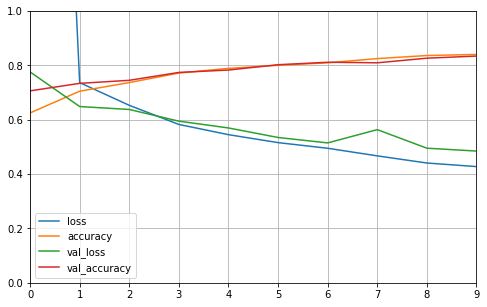

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

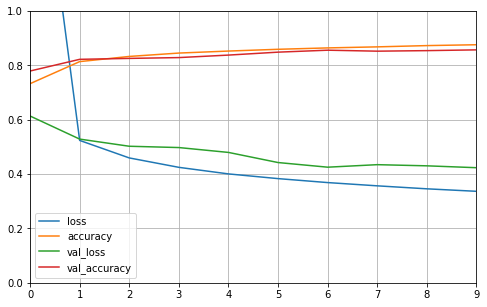

In [0]:
plot_learning_curves(history)

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.4376 - accuracy: 0.8532


[0.43761702871322633, 0.8532]